# Final Triplets for Rule-Based KG & REBEL-ClausIE Comparison

1. Import the previously manually adjusted "rule_original_whole_triplets_III.csv", now named "Clean_Use_Case_III_KG.csv"
2. Add the Article Information as Node Property 
3. Visualize the Identify Entity Classes 
4. Compare ClausIE with REBEL 

## Import Packages

In [1]:
import pandas as pd
import ast
import spacy
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotx
from wordcloud import WordCloud
import seaborn as sns

## Load Triplet III CSV FILE "Clean_Use_Case_III_KG"

* This CSV is manually adjusted directly from the whole Tail Full Triplet III csv ("rule_original_whole_triplets_III.csv")
* Add Article Content as column
* Export for Neo4j Use

In [2]:
ground_truth = pd.read_csv(r'C:\Users\Student\Desktop\Thesis-Coding\Thesis\Clean_Use_Case_III_KG.csv')

In [3]:
ground_truth

,Head,Relation,Tail,Head_Class,Tail_Class,Title,Articles
0,Letter of Amendment,CONCERNS,Amendment Updating,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...
1,Amendment Updating,INCLUDED_IN,Letter of Amendment,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...
2,Letter of Amendment,CREATED_BY,European Commission,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...
3,Letter of Amendment,SEND_TO,European Council,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...
4,Letter of Amendment,SEND_TO,European Parliament,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...
...,...,...,...,...,...,...,...
126,European Council,SUBCLASS_OF,European Union,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 40 Estimated budget of the Union bodi...
127,National Parliaments,SUBCLASS_OF,European Union,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 40 Estimated budget of the Union bodi...
128,European Parliament,SUBCLASS_OF,European Union,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 40 Estimated budget of the Union bodi...
129,European Commission,SUBCLASS_OF,European Union,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 40 Estimated budget of the Union bodi...


In [4]:
ground_truth.shape

(131, 7)

In [5]:
ground_truth.columns

Index(['Head', 'Relation', 'Tail', 'Head_Class', 'Tail_Class', 'Title',
       'Articles'],
      dtype='object')

In [6]:
for column_name in ground_truth.columns:
   ground_truth[column_name] = ground_truth[column_name].apply(lambda x: str(x).strip())

## Add Article Information as Property using "final_dataframe.csv" 

In [7]:
ground_truth["Articles"].unique()

array(['Article 42  Letter of amendment to the draft budget',
       'Article 44  Draft amending budgets', 'Article 41  Draft budget',
       'Article 54  Compliance with the multiannual financial framework and Decision 2014/335/EU, Euratom',
       'Article 52  Presentation of the budget',
       'Article 51  Emergency Aid Reserve',
       'Article 39  Estimates of revenue and expenditure',
       'Article 50  Negative reserve', 'Article 47  Budget nomenclature',
       'Article 49  Provisions',
       'Article 40  Estimated budget of the Union bodies referred to in Article 70',
       'Article 48  Negative revenue',
       'Article 43  Obligations of Member States as a result of the adoption of the budget'],
      dtype=object)

In [8]:
def convert_to_list(column):
    return column.apply(ast.literal_eval)

original_text = pd.read_csv(r'C:\Users\Student\Desktop\Thesis-Coding\Thesis\final_dataframe.csv')

original_text['Content'] = convert_to_list(original_text['Content'])

original_text["Articles"] = original_text["Articles"].apply(lambda x: x.strip())

original_text = original_text[["Articles","Content"]]


def get_content(con_list):
    con_text = "".join(con_list).strip()
    con_text = re.sub('\n', '', "".join(con_text))
    con_text = re.sub('  ', ' ', con_text)

    return con_text

def denoise_paragraph(paragraph):
    para_text = re.sub('\n', '', paragraph.strip())
    
    return para_text
    
original_text["Content_Text"] = original_text["Content"].apply(get_content)

original_text = original_text.explode("Content")

original_text["Paragraph_Text"] = original_text["Content"].apply(denoise_paragraph)

original_text = original_text[["Articles","Content_Text","Paragraph_Text"]]

article_content = original_text[["Articles","Content_Text"]]

article_content.drop_duplicates(["Articles","Content_Text"], inplace=True, ignore_index=True)

C:\Users\Student\AppData\Local\Temp\ipykernel_4740\3352836925.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_content.drop_duplicates(["Articles","Content_Text"], inplace=True, ignore_index=True)


In [9]:
article_content.head()

,Articles,Content_Text
0,Article 1 Subject matter,This Regulation lays down the rules for the es...
1,Article 2 Definitions,‘applicant’ means a natural person or an entit...
2,Article 3 Compliance of secondary legislation...,Provisions concerning the implementation of th...
3,"Article 4 Periods, dates and time limits","Unless otherwise provided in this Regulation, ..."
4,Article 5 Protection of personal data,This Regulation is without prejudice to Regula...


In [10]:
ground_truth = pd.merge(ground_truth, article_content, on='Articles', how='left')

In [11]:
ground_truth.shape

(131, 8)

## Final Triplets for Knowledge Graph

In [12]:
ground_truth

,Head,Relation,Tail,Head_Class,Tail_Class,Title,Articles,Content_Text
0,Letter of Amendment,CONCERNS,Amendment Updating,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
1,Amendment Updating,INCLUDED_IN,Letter of Amendment,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
2,Letter of Amendment,CREATED_BY,European Commission,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
3,Letter of Amendment,SEND_TO,European Council,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
4,Letter of Amendment,SEND_TO,European Parliament,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
...,...,...,...,...,...,...,...,...
126,European Council,SUBCLASS_OF,European Union,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 40 Estimated budget of the Union bodi...,"By 31 January each year, each Union body refer..."
127,National Parliaments,SUBCLASS_OF,European Union,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 40 Estimated budget of the Union bodi...,"By 31 January each year, each Union body refer..."
128,European Parliament,SUBCLASS_OF,European Union,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 40 Estimated budget of the Union bodi...,"By 31 January each year, each Union body refer..."
129,European Commission,SUBCLASS_OF,European Union,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 40 Estimated budget of the Union bodi...,"By 31 January each year, each Union body refer..."


In [13]:
ground_truth.dtypes

Head            object
Relation        object
Tail            object
Head_Class      object
Tail_Class      object
Title           object
Articles        object
Content_Text    object
dtype: object

## Save to CSV for use in Neo4j

In [14]:
ground_truth.to_csv(r'C:\Users\Student\Desktop\Thesis-Coding\Thesis\Final_Use_Case_III_Ground_Truth_KG.csv', index=False) 

In [30]:
ground_truth.head()

,Head,Relation,Tail,Head_Class,Tail_Class,Title,Articles,Content_Text
0,Letter of Amendment,CONCERNS,Amendment Updating,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
1,Amendment Updating,INCLUDED_IN,Letter of Amendment,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
2,Letter of Amendment,CREATED_BY,European Commission,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
3,Letter of Amendment,SEND_TO,European Council,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
4,Letter of Amendment,SEND_TO,European Parliament,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...


In [31]:
ground_truth["Head_Class"].unique()

array(['Budget_Amendment', 'Draft_Budget', 'Working_Documents',
       'Budget_Tool', 'EU_Action', 'Human_Resources', 'Financial_Tool',
       'Estimates', 'Legal_Construct', 'Fund', 'Sections', 'Aid',
       'Person', 'Appropriations', 'Provisions', 'Adopted_Draft_Budget',
       'European_Union'], dtype=object)

In [32]:
ground_truth["Tail_Class"].unique()

array(['Budget_Amendment', 'European_Union', 'Estimates', 'Draft_Budget',
       'Budget', 'Legal_Construct', 'Working_Documents', 'Budget_Tool',
       'Fund', 'EU_Action', 'Human_Resources', 'Financial_Tool', 'Person',
       'Sections', 'Appropriations', 'Aid', 'Provisions', 'Article',
       'Adopted_Draft_Budget'], dtype=object)

In [33]:
ground_truth["Relation"].unique()

array(['CONCERNS', 'INCLUDED_IN', 'CREATED_BY', 'SEND_TO', 'SUBCLASS_OF',
       'COMPLIES_TO', 'IS_INSTANCE_OF', 'COMPRISED_OF', 'RULED_BY',
       'CONCERN', 'EVALUATED_BY', 'MEASURED_BY', 'FUNDED_BY', 'CONTAIN',
       'CONSULTS', 'COMPRISES_OF', 'EXAMINED_BY', 'NOT_RULED_BY',
       'PROVIDED_BY', 'DRAWN_BY', 'ESTABLISHED_BY', 'INCLUDES', 'PAID_TO',
       'PAY', 'BASED_ON', 'LEADS_TO', 'APPROVE_OF'], dtype=object)

In [34]:
ground_truth["Head"].unique()

array(['Letter of Amendment', 'Amendment Updating', 'Budget Amendment',
       'Draft Budget', 'Structure', 'Working Documents',
       'Budget Guarantees and Common Provisioning Fund Work Document',
       'Budgetary Guarantees', 'Operations',
       'Establishment Plan Work Document', 'Establishment Plan',
       'Euratom Supply Agency Staff', 'Personnel Statistics',
       'Financial Instruments Work Document', 'Financial Tables',
       'Financial Instruments', 'Performance',
       'Duration Reduction Action Plan', 'Administrative Expenditure',
       'Public-Private Partnership', 'Trust Funds Working Document',
       'Union Activities', 'Trust Funds', 'Objectives', 'Sections',
       'Commission Budget Section', 'Expenditure Estimates',
       'General Summary Statement', 'Budget Lines', 'Emergency Aid',
       'Emergency Aid Reserve', 'High Representative', 'Negative Reserve',
       'Payment Appropriations', 'Operational Appropriations',
       'Administrative Appropriations',

In [35]:
ground_truth["Tail"].unique()

array(['Amendment Updating', 'Letter of Amendment', 'European Commission',
       'European Council', 'European Parliament', 'Expenditure Estimates',
       'Draft Budget', 'Budget', 'Euratom Treaty',
       'Multiannual Financial Framework', 'Structure',
       'Working Documents', 'Budgetary Guarantees',
       'Common Provisioning Fund', 'Basic Act', 'EU_Action', 'Operations',
       'Establishment Plan', 'Personnel', 'Posts', 'Number', 'Grade',
       'Gender Balance', 'Administrative Units', 'Financial Tables',
       'Financial Instruments', 'Performance', 'Realized Investment',
       'Private Capital', 'Achieved Target', 'Multiplier Effect',
       'Annual Discharge Procedure Framework',
       'Administrative Expenditure', 'Management Fee',
       'Financial Operating Charge', 'Public-Private Partnership',
       'Trust Funds', 'External Donors', 'Objectives', 'Sections',
       'General Summary Statement', 'Payment Appropriations',
       'Commitments', 'Budget Lines', 'Token

In [36]:
ground_truth[ground_truth["Relation"]=="SUBCLASS_OF"]

,Head,Relation,Tail,Head_Class,Tail_Class,Title,Articles,Content_Text
7,Budget Amendment,SUBCLASS_OF,Draft Budget,Budget_Amendment,Draft_Budget,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 44 Draft amending budgets,The Commission may present draft amending budg...
8,Draft Budget,SUBCLASS_OF,Budget,Draft_Budget,Budget,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 41 Draft budget,The Commission shall submit a proposal contain...
11,Structure,SUBCLASS_OF,Draft Budget,Draft_Budget,Draft_Budget,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 41 Draft budget,The Commission shall submit a proposal contain...
12,Working Documents,SUBCLASS_OF,Structure,Working_Documents,Draft_Budget,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 41 Draft budget,The Commission shall submit a proposal contain...
17,Operations,SUBCLASS_OF,EU_Action,EU_Action,EU_Action,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 41 Draft budget,The Commission shall submit a proposal contain...
40,Administrative Expenditure,SUBCLASS_OF,Expenditure Estimates,Estimates,Estimates,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 41 Draft budget,The Commission shall submit a proposal contain...
51,Objectives,SUBCLASS_OF,EU_Action,EU_Action,EU_Action,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 41 Draft budget,The Commission shall submit a proposal contain...
54,Sections,SUBCLASS_OF,Structure,Sections,Draft_Budget,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 41 Draft budget,The Commission shall submit a proposal contain...
64,Emergency Aid,SUBCLASS_OF,EU_Action,Aid,EU_Action,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 51 Emergency Aid Reserve,The section of the budget relating to the Comm...
73,Payment Appropriations,SUBCLASS_OF,Appropriations,Appropriations,Appropriations,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 52 Presentation of the budget,The budget shall show: (a) in the general stat...


## Visualize captured Entities 

* Bar plot
* Word Cloud of Classes
* Bubble Plot 

In [37]:
tail_class = ground_truth["Tail_Class"].to_list()
head_class = ground_truth["Head_Class"].to_list()

class_dictionary_unique_entities = {}
for class_name_t in tail_class:
    if class_name_t not in class_dictionary_unique_entities.keys():
        class_dictionary_unique_entities[class_name_t] = []

for class_name_h in head_class:
    if class_name_h not in class_dictionary_unique_entities.keys():
        class_dictionary_unique_entities[class_name_h] = []

for index, row in ground_truth.iterrows():
    if row[0] not in class_dictionary_unique_entities[row[3]]:
        class_dictionary_unique_entities[row[3]].append(row[0])
    if row[2] not in class_dictionary_unique_entities[row[4]]:
        class_dictionary_unique_entities[row[4]].append(row[2])


class_dictionary_total_entities = {}
for class_name_t in tail_class:
    if class_name_t not in class_dictionary_total_entities.keys():
        class_dictionary_total_entities[class_name_t] = []

for class_name_h in head_class:
    if class_name_h not in class_dictionary_total_entities.keys():
        class_dictionary_total_entities[class_name_h] = []




for index, row in ground_truth.iterrows():
     class_dictionary_total_entities[row[3]].append(row[0])
     class_dictionary_total_entities[row[4]].append(row[2])

C:\Users\Student\AppData\Local\Temp\ipykernel_11932\1561387163.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in class_dictionary_unique_entities[row[3]]:
C:\Users\Student\AppData\Local\Temp\ipykernel_11932\1561387163.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  class_dictionary_unique_entities[row[3]].append(row[0])
C:\Users\Student\AppData\Local\Temp\ipykernel_11932\1561387163.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

In [38]:
unique_entities_per_cat = {}
total_entities_per_cat = {}

for category in class_dictionary_unique_entities.keys():
    unique_entities_per_cat[category]=len(class_dictionary_unique_entities[category])
    total_entities_per_cat[category]=len(class_dictionary_total_entities[category])


In [39]:
total_entities_per_cat

{'Budget_Amendment': 11,
 'European_Union': 32,
 'Estimates': 27,
 'Draft_Budget': 30,
 'Budget': 1,
 'Legal_Construct': 16,
 'Working_Documents': 15,
 'Budget_Tool': 10,
 'Fund': 6,
 'EU_Action': 17,
 'Human_Resources': 16,
 'Financial_Tool': 20,
 'Person': 3,
 'Sections': 17,
 'Appropriations': 21,
 'Aid': 9,
 'Provisions': 3,
 'Article': 1,
 'Adopted_Draft_Budget': 7}

In [40]:
unique_entities_per_cat

{'Budget_Amendment': 3,
 'European_Union': 7,
 'Estimates': 9,
 'Draft_Budget': 5,
 'Budget': 1,
 'Legal_Construct': 7,
 'Working_Documents': 5,
 'Budget_Tool': 4,
 'Fund': 2,
 'EU_Action': 6,
 'Human_Resources': 8,
 'Financial_Tool': 9,
 'Person': 2,
 'Sections': 7,
 'Appropriations': 6,
 'Aid': 3,
 'Provisions': 1,
 'Article': 1,
 'Adopted_Draft_Budget': 2}

In [41]:
total_freq = pd.DataFrame(list(total_entities_per_cat.items()), columns=['Categories', 'Frequency'])

unique_freq = pd.DataFrame(list(unique_entities_per_cat.items()), columns=['Categories', 'Frequency'])

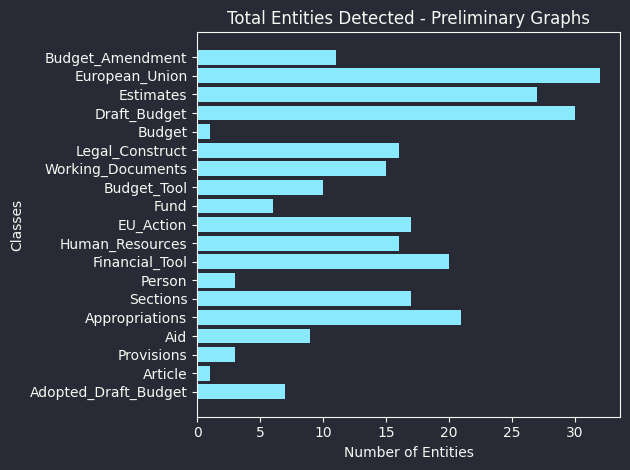

In [42]:
# BAR PLOT 

plt.style.use(matplotx.styles.dracula)
        
fig, ax = plt.subplots()


ax.barh(total_freq["Categories"], total_freq["Frequency"])
ax.invert_yaxis()
ax.set_ylabel('Classes')
ax.set_xlabel('Number of Entities')
ax.set_title("Total Entities Detected - Preliminary Graphs")

plt.tight_layout()
# ax.tick_params(axis='y', labelsize=8)

plt.show()

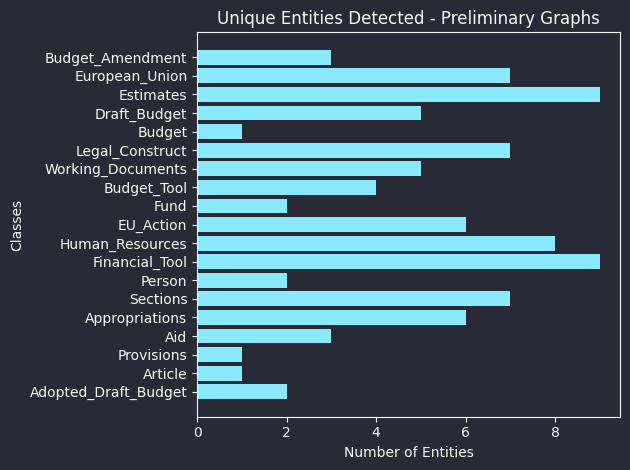

In [43]:
plt.style.use(matplotx.styles.dracula)
        
fig, ax = plt.subplots()


ax.barh(unique_freq["Categories"], unique_freq["Frequency"])
ax.invert_yaxis()
ax.set_ylabel('Classes')
ax.set_xlabel('Number of Entities')
ax.set_title("Unique Entities Detected - Preliminary Graphs")

plt.tight_layout()
# ax.tick_params(axis='y', labelsize=8)

plt.show()

In [44]:
# Bubble Plot - Categories 

# import plotly.express as px

# fig = px.scatter(total_freq, x="Frequency", y="Categories", size="Frequency", color="Categories",
#            hover_name="Categories", log_x=True, size_max=60)
# fig.show(renderer="browser") 

In [48]:
# Bubble Plot - Notebook

import plotly.express as px

fig = px.scatter(total_freq, x="Frequency", y="Categories", size="Frequency", color="Categories",
           hover_name="Categories", log_x=True, size_max=60, title="Detected Entities per Class")
fig.show() 

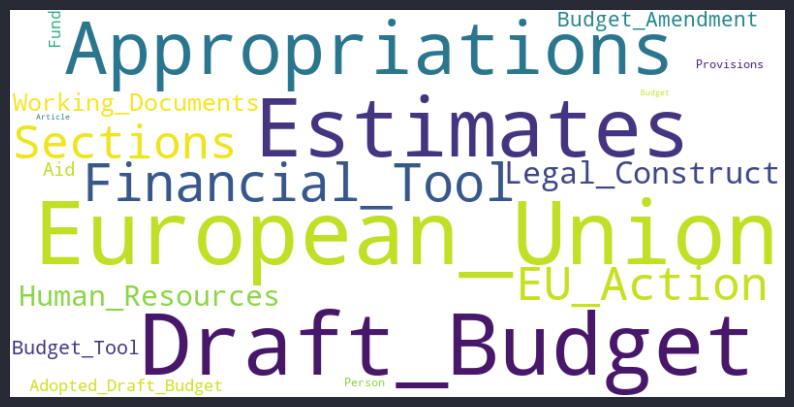

In [43]:
# Word Cloud of classes - Rank based on Total Frequency 

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=total_entities_per_cat)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


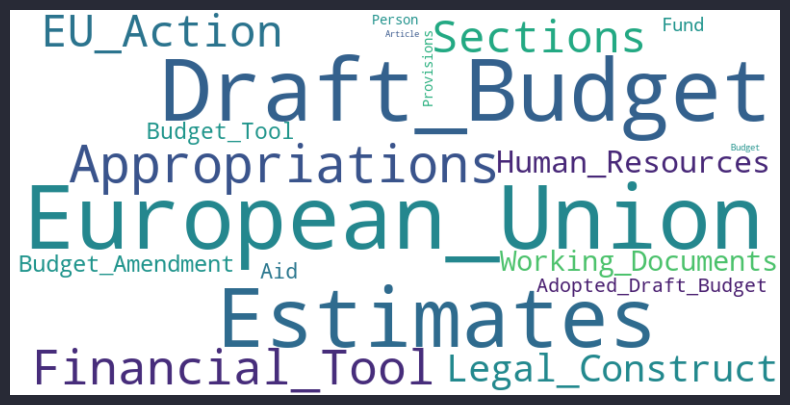

In [35]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=total_entities_per_cat)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Compare REBEL with Rule-Based Entity Classes

In [3]:
# Load REBEL entities 
rebel_final = pd.read_csv(r'C:\Users\Student\Desktop\Thesis-Coding\Thesis\REBEL_triplets_per_title\rebel_triplets_III_clean.csv')

for name in rebel_final.columns:
     rebel_final[name] = rebel_final[name].apply(lambda x: x.strip())

In [4]:
# Load Rule-Based entities
ground_truth = pd.read_csv(r'C:\Users\Student\Desktop\Thesis-Coding\Thesis\Final_Use_Case_III_Ground_Truth_KG.csv')


In [5]:
rebel_final.head()


,Head,Relation,Tail,Head_Class,Tail_Class,Title,Article,Paragraph_Coreferenced,Sentence_Coreferenced,Article_Content
0,European Parliament,SUBCLASS OF,European Council,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 39 Estimates of revenue and expenditure,each union institution other than the commissi...,each union institution other than the commissi...,Each Union institution other than the Commissi...
1,Crisis Response,SUBCLASS OF,Humanitarian Aid,EU_Action,Aid,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 39 Estimates of revenue and expenditure,the high representative shall hold consultatio...,the high representative shall hold consultatio...,Each Union institution other than the Commissi...
2,Humanitarian Aid,SUBCLASS OF,Crisis Response,Aid,EU_Action,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 39 Estimates of revenue and expenditure,the high representative shall hold consultatio...,the high representative shall hold consultatio...,Each Union institution other than the Commissi...
3,Council Estimate,SUBCLASS OF,European Council,Estimates,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 39 Estimates of revenue and expenditure,the commission shall draw up the commission ow...,"in preparing the council estimates, the commis...",Each Union institution other than the Commissi...
4,European Parliament,SUBCLASS OF,National Parliament,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 41 Draft budget,the commission shall submit a proposal contain...,"the draft budget shall transmit that proposal,...",The Commission shall submit a proposal contain...


In [6]:
ground_truth.head()

,Head,Relation,Tail,Head_Class,Tail_Class,Title,Articles,Content_Text
0,Letter of Amendment,CONCERNS,Amendment Updating,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
1,Amendment Updating,INCLUDED_IN,Letter of Amendment,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
2,Letter of Amendment,CREATED_BY,European Commission,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
3,Letter of Amendment,SEND_TO,European Council,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
4,Letter of Amendment,SEND_TO,European Parliament,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...


In [7]:
ground_truth["Head"].unique()

array(['Letter of Amendment', 'Amendment Updating', 'Budget Amendment',
       'Draft Budget', 'Structure', 'Working Documents',
       'Budget Guarantees and Common Provisioning Fund Work Document',
       'Budgetary Guarantees', 'Operations',
       'Establishment Plan Work Document', 'Establishment Plan',
       'Euratom Supply Agency Staff', 'Personnel Statistics',
       'Financial Instruments Work Document', 'Financial Tables',
       'Financial Instruments', 'Performance',
       'Duration Reduction Action Plan', 'Administrative Expenditure',
       'Public-Private Partnership', 'Trust Funds Working Document',
       'Union Activities', 'Trust Funds', 'Objectives', 'Sections',
       'Commission Budget Section', 'Expenditure Estimates',
       'General Summary Statement', 'Budget Lines', 'Emergency Aid',
       'Emergency Aid Reserve', 'High Representative', 'Negative Reserve',
       'Payment Appropriations', 'Operational Appropriations',
       'Administrative Appropriations',

In [8]:
rebel_final["Head"].unique()

array(['European Parliament', 'Crisis Response', 'Humanitarian Aid',
       'Council Estimate', 'Draft Budget', 'Revenue', 'Budget',
       'European Union', 'Union Institution', 'Appropriation',
       'Budget Line', 'Point 30', 'Fund', 'European Commission',
       'Public Private Partnership', 'Equity', 'Management Fee',
       'Financial Operating Charge', 'Annual Discharge Procedure',
       'Financial Instrument', 'Basic Act', 'Court Justice',
       'Competition Law', 'Post', 'Expenditure Estimate Agriculture',
       'Euratom Treaty', 'Member State', 'European Union Solidarity Fund',
       'Amend Budget', 'European Council', 'Administrative Appropriation',
       'Operational Appropriation', 'Pro Memoria', 'Establishment Plan',
       'Administrative Expenditure', 'Net Amount', 'Provision',
       'Negative Reserve', 'Payment Appropriations', 'Emergency Aid',
       'International Monetary Fund', 'Reserve', 'Financial Assistance',
       'Leverage Effect', 'Debt Management', '

In [9]:
# Obtain Frequency per category dataframes for REBEL 

tail_class_re = rebel_final["Tail_Class"].to_list()
head_class_re = rebel_final["Head_Class"].to_list()

# Dictionary for unique entities 
class_dictionary_unique_entities_re = {}
for class_name_t in tail_class_re:
    if class_name_t not in class_dictionary_unique_entities_re.keys():
        class_dictionary_unique_entities_re[class_name_t] = []

for class_name_h in head_class_re:
    if class_name_h not in class_dictionary_unique_entities_re.keys():
        class_dictionary_unique_entities_re[class_name_h] = []

for index, row in rebel_final.iterrows():
    if row[0] not in class_dictionary_unique_entities_re[row[3]]:
        class_dictionary_unique_entities_re[row[3]].append(row[0])
    if row[2] not in class_dictionary_unique_entities_re[row[4]]:
        class_dictionary_unique_entities_re[row[4]].append(row[2])

# Dictionary for total entities
class_dictionary_total_entities_re = {}
for class_name_t in tail_class_re:
    if class_name_t not in class_dictionary_total_entities_re.keys():
        class_dictionary_total_entities_re[class_name_t] = []

for class_name_h in head_class_re:
    if class_name_h not in class_dictionary_total_entities_re.keys():
        class_dictionary_total_entities_re[class_name_h] = []


for index, row in rebel_final.iterrows():
     class_dictionary_total_entities_re[row[3]].append(row[0])
     class_dictionary_total_entities_re[row[4]].append(row[2])

unique_entities_per_cat_re = {}
total_entities_per_cat_re = {}

for category in class_dictionary_unique_entities_re.keys():
    unique_entities_per_cat_re[category]=len(class_dictionary_unique_entities_re[category])
    total_entities_per_cat_re[category]=len(class_dictionary_total_entities_re[category])



total_freq_rebel = pd.DataFrame(list(total_entities_per_cat_re.items()), columns=['Categories', 'Frequency'])
total_freq_rebel.rename(columns={"Categories": "Class", "Frequency": "Total_Frequency"}, inplace=True)
total_freq_rebel["Method"] = "Rebel"

unique_freq_rebel = pd.DataFrame(list(unique_entities_per_cat_re.items()), columns=['Categories', 'Frequency'])
unique_freq_rebel.rename(columns={"Categories": "Class", "Frequency": "Unique_Frequency"}, inplace=True)
unique_freq_rebel["Method"] = "Rebel"

     

C:\Users\Student\AppData\Local\Temp\ipykernel_15672\1983623264.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in class_dictionary_unique_entities_re[row[3]]:
C:\Users\Student\AppData\Local\Temp\ipykernel_15672\1983623264.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  class_dictionary_unique_entities_re[row[3]].append(row[0])
C:\Users\Student\AppData\Local\Temp\ipykernel_15672\1983623264.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by

In [10]:
total_freq_rebel

,Class,Total_Frequency,Method
0,European_Union,39,Rebel
1,Aid,6,Rebel
2,EU_Action,3,Rebel
3,Budget,15,Rebel
4,Estimates,21,Rebel
5,Appropriations,15,Rebel
6,Legal_Construct,16,Rebel
7,Draft_Budget,9,Rebel
8,Working_Documents,2,Rebel
9,Financial_Tool,11,Rebel


In [11]:
unique_freq_rebel

,Class,Unique_Frequency,Method
0,European_Union,7,Rebel
1,Aid,4,Rebel
2,EU_Action,2,Rebel
3,Budget,1,Rebel
4,Estimates,9,Rebel
5,Appropriations,4,Rebel
6,Legal_Construct,9,Rebel
7,Draft_Budget,3,Rebel
8,Working_Documents,1,Rebel
9,Financial_Tool,9,Rebel


In [12]:
total_freq_rebel["Unique_Frequency"] = unique_freq_rebel["Unique_Frequency"]

In [13]:
total_freq_rebel

,Class,Total_Frequency,Method,Unique_Frequency
0,European_Union,39,Rebel,7
1,Aid,6,Rebel,4
2,EU_Action,3,Rebel,2
3,Budget,15,Rebel,1
4,Estimates,21,Rebel,9
5,Appropriations,15,Rebel,4
6,Legal_Construct,16,Rebel,9
7,Draft_Budget,9,Rebel,3
8,Working_Documents,2,Rebel,1
9,Financial_Tool,11,Rebel,9


In [14]:
# Obtain frequency per category dataframe for Rule-Based Model 

tail_class = ground_truth["Tail_Class"].to_list()
head_class = ground_truth["Head_Class"].to_list()

class_dictionary_unique_entities = {}
for class_name_t in tail_class:
    if class_name_t not in class_dictionary_unique_entities.keys():
        class_dictionary_unique_entities[class_name_t] = []

for class_name_h in head_class:
    if class_name_h not in class_dictionary_unique_entities.keys():
        class_dictionary_unique_entities[class_name_h] = []

for index, row in ground_truth.iterrows():
    if row[0] not in class_dictionary_unique_entities[row[3]]:
        class_dictionary_unique_entities[row[3]].append(row[0])
    if row[2] not in class_dictionary_unique_entities[row[4]]:
        class_dictionary_unique_entities[row[4]].append(row[2])


class_dictionary_total_entities = {}
for class_name_t in tail_class:
    if class_name_t not in class_dictionary_total_entities.keys():
        class_dictionary_total_entities[class_name_t] = []

for class_name_h in head_class:
    if class_name_h not in class_dictionary_total_entities.keys():
        class_dictionary_total_entities[class_name_h] = []


for index, row in ground_truth.iterrows():
     class_dictionary_total_entities[row[3]].append(row[0])
     class_dictionary_total_entities[row[4]].append(row[2])


unique_entities_per_cat = {}
total_entities_per_cat = {}

for category in class_dictionary_unique_entities.keys():
    unique_entities_per_cat[category]=len(class_dictionary_unique_entities[category])
    total_entities_per_cat[category]=len(class_dictionary_total_entities[category])


total_freq_rule = pd.DataFrame(list(total_entities_per_cat.items()), columns=['Categories', 'Frequency'])
total_freq_rule.rename(columns={"Categories": "Class", "Frequency": "Total_Frequency"}, inplace=True)
total_freq_rule["Method"] = "ClausIE"

unique_freq_rule = pd.DataFrame(list(unique_entities_per_cat.items()), columns=['Categories', 'Frequency'])
unique_freq_rule.rename(columns={"Categories": "Class", "Frequency": "Unique_Frequency"}, inplace=True)
unique_freq_rule["Method"] = "ClausIE"

C:\Users\Student\AppData\Local\Temp\ipykernel_15672\3094713780.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in class_dictionary_unique_entities[row[3]]:
C:\Users\Student\AppData\Local\Temp\ipykernel_15672\3094713780.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  class_dictionary_unique_entities[row[3]].append(row[0])
C:\Users\Student\AppData\Local\Temp\ipykernel_15672\3094713780.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

In [15]:
total_freq_rule

,Class,Total_Frequency,Method
0,Budget_Amendment,11,ClausIE
1,European_Union,32,ClausIE
2,Estimates,27,ClausIE
3,Draft_Budget,30,ClausIE
4,Budget,1,ClausIE
5,Legal_Construct,16,ClausIE
6,Working_Documents,15,ClausIE
7,Budget_Tool,10,ClausIE
8,Fund,6,ClausIE
9,EU_Action,17,ClausIE


In [16]:
unique_freq_rule

,Class,Unique_Frequency,Method
0,Budget_Amendment,3,ClausIE
1,European_Union,7,ClausIE
2,Estimates,9,ClausIE
3,Draft_Budget,5,ClausIE
4,Budget,1,ClausIE
5,Legal_Construct,7,ClausIE
6,Working_Documents,5,ClausIE
7,Budget_Tool,4,ClausIE
8,Fund,2,ClausIE
9,EU_Action,6,ClausIE


In [17]:
total_freq_rule["Unique_Frequency"] = unique_freq_rule["Unique_Frequency"]

In [18]:
total_freq_rule

,Class,Total_Frequency,Method,Unique_Frequency
0,Budget_Amendment,11,ClausIE,3
1,European_Union,32,ClausIE,7
2,Estimates,27,ClausIE,9
3,Draft_Budget,30,ClausIE,5
4,Budget,1,ClausIE,1
5,Legal_Construct,16,ClausIE,7
6,Working_Documents,15,ClausIE,5
7,Budget_Tool,10,ClausIE,4
8,Fund,6,ClausIE,2
9,EU_Action,17,ClausIE,6


In [19]:
rebel_and_claus = pd.concat([total_freq_rebel, total_freq_rule], ignore_index=True)

In [20]:
rebel_and_claus

,Class,Total_Frequency,Method,Unique_Frequency
0,European_Union,39,Rebel,7
1,Aid,6,Rebel,4
2,EU_Action,3,Rebel,2
3,Budget,15,Rebel,1
4,Estimates,21,Rebel,9
5,Appropriations,15,Rebel,4
6,Legal_Construct,16,Rebel,9
7,Draft_Budget,9,Rebel,3
8,Working_Documents,2,Rebel,1
9,Financial_Tool,11,Rebel,9


In [21]:
rebel_and_claus_group = rebel_and_claus.groupby(["Class", "Method"]).sum()
rebel_and_claus_group 

Total_Frequency  Unique_Frequency
Class                      Method                                    
Adopted_Draft_Budget       ClausIE                7                 2
Aid                        ClausIE                9                 3
                           Rebel                  6                 4
Appropriations             ClausIE               21                 6
                           Rebel                 15                 4
Article                    ClausIE                1                 1
Budget                     ClausIE                1                 1
                           Rebel                 15                 1
Budget_Amendment           ClausIE               11                 3
                           Rebel                  4                 2
Budget_Tool                ClausIE               10                 4
                           Rebel                 12                 6
Draft_Budget               ClausIE               30                 5
                           Rebel                  9                 3
EU_Action                  ClausIE               17                 6
                           Rebel                  3                 2
Estimates                  ClausIE               27                 9
                           Rebel                 21                 9
European_Union             ClausIE               32                 7
                           Rebel                 39                 7
Financial_Tool             ClausIE               20                 9
                           Rebel                 11                 9
Fund                       ClausIE                6                 2
                           Rebel                  4                 2
Human_Resources            ClausIE               16                 8
                           Rebel                  6                 5
International_Organization Rebel                  2                 2
Legal_Construct            ClausIE               16                 7
                           Rebel                 16                 9
Person                     ClausIE                3                 2
                           Rebel                  1                 1
Provisions                 ClausIE                3                 1
                           Rebel                  2                 1
Sections                   ClausIE               17                 7
Working_Documents          ClausIE               15                 5
                           Rebel                  2                 1

In [22]:
rebel_and_claus_group_df = rebel_and_claus.groupby(["Class", "Method"]).sum().reset_index()
rebel_and_claus_group_df

,Class,Method,Total_Frequency,Unique_Frequency
0,Adopted_Draft_Budget,ClausIE,7,2
1,Aid,ClausIE,9,3
2,Aid,Rebel,6,4
3,Appropriations,ClausIE,21,6
4,Appropriations,Rebel,15,4
5,Article,ClausIE,1,1
6,Budget,ClausIE,1,1
7,Budget,Rebel,15,1
8,Budget_Amendment,ClausIE,11,3
9,Budget_Amendment,Rebel,4,2


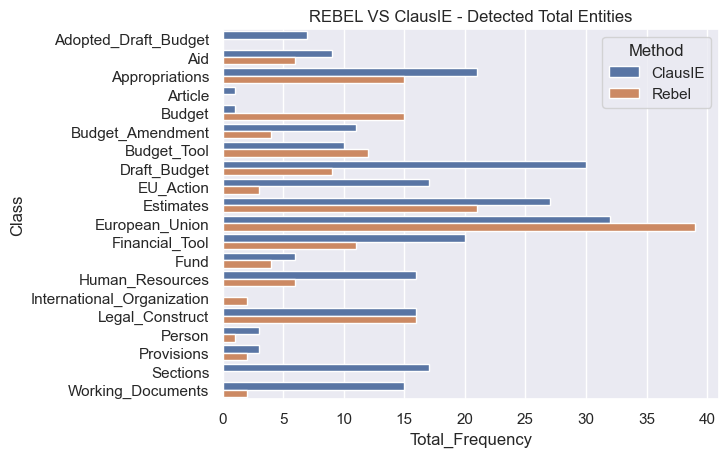

In [23]:
# Bar Plot to compare captured total entities
sns.set() 
# Create the bar plot
ax = sns.barplot(data=rebel_and_claus_group_df, x="Total_Frequency", y="Class", hue="Method")

# Add a title
ax.set_title("REBEL VS ClausIE - Detected Total Entities")

# Display the plot
plt.show()

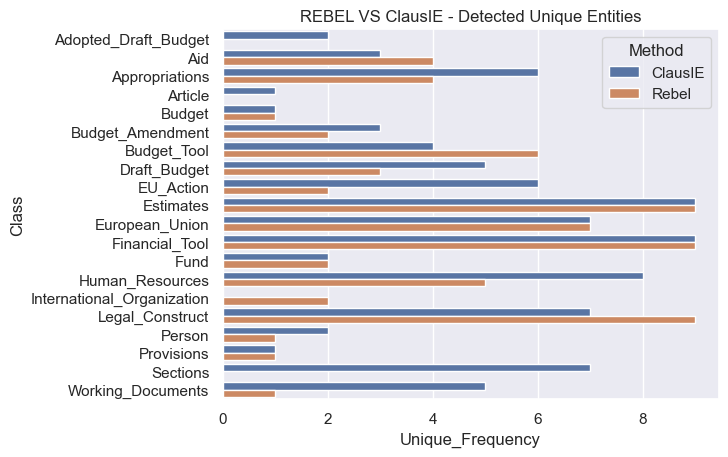

In [24]:

# Create the bar plot
ax = sns.barplot(data=rebel_and_claus_group_df, x="Unique_Frequency", y="Class", hue="Method")

# Add a title
ax.set_title("REBEL VS ClausIE - Detected Unique Entities")

# Display the plot
plt.show()

In [25]:
total_freq_rule.head()

,Class,Total_Frequency,Method,Unique_Frequency
0,Budget_Amendment,11,ClausIE,3
1,European_Union,32,ClausIE,7
2,Estimates,27,ClausIE,9
3,Draft_Budget,30,ClausIE,5
4,Budget,1,ClausIE,1


In [26]:
total_freq_rule["Class"].tolist()

['Budget_Amendment',
 'European_Union',
 'Estimates',
 'Draft_Budget',
 'Budget',
 'Legal_Construct',
 'Working_Documents',
 'Budget_Tool',
 'Fund',
 'EU_Action',
 'Human_Resources',
 'Financial_Tool',
 'Person',
 'Sections',
 'Appropriations',
 'Aid',
 'Provisions',
 'Article',
 'Adopted_Draft_Budget']

In [27]:
total_freq_rebel["Class"].tolist()

['European_Union',
 'Aid',
 'EU_Action',
 'Budget',
 'Estimates',
 'Appropriations',
 'Legal_Construct',
 'Draft_Budget',
 'Working_Documents',
 'Financial_Tool',
 'Human_Resources',
 'Budget_Amendment',
 'Person',
 'Budget_Tool',
 'Provisions',
 'International_Organization',
 'Fund']

In [28]:
total_freq_rebel["Total_Frequency"].tolist()

[39, 6, 3, 15, 21, 15, 16, 9, 2, 11, 6, 4, 1, 12, 2, 2, 4]

In [29]:
total_freq_rule["Total_Frequency"].tolist()

[11, 32, 27, 30, 1, 16, 15, 10, 6, 17, 16, 20, 3, 17, 21, 9, 3, 1, 7]

In [30]:
total_freq_rule["Unique_Frequency"].tolist()

[3, 7, 9, 5, 1, 7, 5, 4, 2, 6, 8, 9, 2, 7, 6, 3, 1, 1, 2]

In [31]:
# Radar Chart to compare captured total entities 

import plotly.graph_objects as go

categories_claus = total_freq_rule["Class"].tolist()

categories_rebel = total_freq_rebel["Class"].tolist()

r_claus = total_freq_rule["Unique_Frequency"].tolist()

r_rebel = total_freq_rebel["Unique_Frequency"].tolist()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r_claus,
      theta=categories_claus,
      fill='toself',
      name='ClausIE'
))
fig.add_trace(go.Scatterpolar(
      r=r_rebel,
      theta=categories_rebel,
      fill='toself',
      name='Rebel'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    )),
  showlegend=True
)

fig.show()

In [32]:
# Radar Chart to compare captured total entities 

import plotly.graph_objects as go

categories_claus = total_freq_rule["Class"].tolist()

categories_rebel = total_freq_rebel["Class"].tolist()

r_claus = total_freq_rule["Total_Frequency"].tolist()

r_rebel = total_freq_rebel["Total_Frequency"].tolist()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r_claus,
      theta=categories_claus,
      fill='toself',
      name='ClausIE'
))
fig.add_trace(go.Scatterpolar(
      r=r_rebel,
      theta=categories_rebel,
      fill='toself',
      name='Rebel'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    )),
  showlegend=True
)

fig.show()

In [33]:
import plotly.graph_objects as go

categories_claus = total_freq_rule["Class"].tolist()

r_claus = total_freq_rule["Total_Frequency"].tolist()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r_claus,
      theta=categories_claus,
      fill='toself',
      name='ClausIE'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 40]
    )),
  showlegend=True
)

fig.show()

In [34]:
import plotly.graph_objects as go

categories_claus = total_freq_rebel["Class"].tolist()

r_claus = total_freq_rebel["Total_Frequency"].tolist()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r_claus,
      theta=categories_claus,
      fill='toself',
      name='Rebel'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 40]
    )),
  showlegend=True
)

fig.show()

In [35]:
# Percentage of identical entities REBEL managed to capture - Accuracy 
rebel_final.head()



,Head,Relation,Tail,Head_Class,Tail_Class,Title,Article,Paragraph_Coreferenced,Sentence_Coreferenced,Article_Content
0,European Parliament,SUBCLASS OF,European Council,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 39 Estimates of revenue and expenditure,each union institution other than the commissi...,each union institution other than the commissi...,Each Union institution other than the Commissi...
1,Crisis Response,SUBCLASS OF,Humanitarian Aid,EU_Action,Aid,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 39 Estimates of revenue and expenditure,the high representative shall hold consultatio...,the high representative shall hold consultatio...,Each Union institution other than the Commissi...
2,Humanitarian Aid,SUBCLASS OF,Crisis Response,Aid,EU_Action,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 39 Estimates of revenue and expenditure,the high representative shall hold consultatio...,the high representative shall hold consultatio...,Each Union institution other than the Commissi...
3,Council Estimate,SUBCLASS OF,European Council,Estimates,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 39 Estimates of revenue and expenditure,the commission shall draw up the commission ow...,"in preparing the council estimates, the commis...",Each Union institution other than the Commissi...
4,European Parliament,SUBCLASS OF,National Parliament,European_Union,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 41 Draft budget,the commission shall submit a proposal contain...,"the draft budget shall transmit that proposal,...",The Commission shall submit a proposal contain...


In [36]:
ground_truth.head()

,Head,Relation,Tail,Head_Class,Tail_Class,Title,Articles,Content_Text
0,Letter of Amendment,CONCERNS,Amendment Updating,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
1,Amendment Updating,INCLUDED_IN,Letter of Amendment,Budget_Amendment,Budget_Amendment,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
2,Letter of Amendment,CREATED_BY,European Commission,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
3,Letter of Amendment,SEND_TO,European Council,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...
4,Letter of Amendment,SEND_TO,European Parliament,Budget_Amendment,European_Union,TITLE III ESTABLISHMENT AND STRUCTURE OF THE B...,Article 42 Letter of amendment to the draft b...,On the basis of any new information which was ...


In [37]:
rebel_final["Head"].to_list()

['European Parliament',
 'Crisis Response',
 'Humanitarian Aid',
 'Council Estimate',
 'European Parliament',
 'Draft Budget',
 'Revenue',
 'Budget',
 'European Union',
 'Union Institution',
 'Appropriation',
 'Budget',
 'Budget Line',
 'Budget Line',
 'Point 30',
 'Point 30',
 'Draft Budget',
 'Budget',
 'Draft Budget',
 'Fund',
 'European Commission',
 'Public Private Partnership',
 'Equity',
 'Management Fee',
 'Financial Operating Charge',
 'Annual Discharge Procedure',
 'Financial Instrument',
 'European Union',
 'Basic Act',
 'Basic Act',
 'Court Justice',
 'Competition Law',
 'Budget Line',
 'Revenue',
 'Post',
 'Expenditure Estimate Agriculture',
 'Expenditure Estimate Agriculture',
 'Expenditure Estimate Agriculture',
 'Euratom Treaty',
 'European Parliament',
 'Euratom Treaty',
 'European Union',
 'Member State',
 'European Union Solidarity Fund',
 'European Union Solidarity Fund',
 'Budget',
 'Amend Budget',
 'European Union Solidarity Fund',
 'European Parliament',
 'Europe

In [38]:
len(rebel_final["Tail"].to_list())

84

In [39]:
total_rebel_entities = rebel_final["Head"].to_list() + rebel_final["Tail"].to_list()

In [40]:
len(total_rebel_entities)

168

In [41]:
total_claus_entities = ground_truth["Head"].to_list() + ground_truth["Tail"].to_list()

In [42]:
len(total_claus_entities)

262

In [43]:
claus_unique = list(set(total_claus_entities))

rebel_unique = list(set(total_rebel_entities))

In [44]:
(len(rebel_unique) / len(claus_unique)) * 100

77.01149425287356

In [49]:
# bar plot of percentage unique entities captured per class 

perce_per_class = {}
# for category in class_dictionary_unique_entities_re.keys():
#     perce_per_class[category] = 0

         
for category in class_dictionary_unique_entities.keys():
    if category not in perce_per_class.keys():
        perce_per_class[category] = 0 




In [50]:
perce_per_class

{'Budget_Amendment': 0,
 'European_Union': 0,
 'Estimates': 0,
 'Draft_Budget': 0,
 'Budget': 0,
 'Legal_Construct': 0,
 'Working_Documents': 0,
 'Budget_Tool': 0,
 'Fund': 0,
 'EU_Action': 0,
 'Human_Resources': 0,
 'Financial_Tool': 0,
 'Person': 0,
 'Sections': 0,
 'Appropriations': 0,
 'Aid': 0,
 'Provisions': 0,
 'Article': 0,
 'Adopted_Draft_Budget': 0}

In [52]:
for category in class_dictionary_unique_entities_re.keys():
    if category in perce_per_class.keys():
        for entity in class_dictionary_unique_entities_re[category]:
            if entity in class_dictionary_unique_entities[category]:
                perce_per_class[category] = perce_per_class[category] + 1



In [53]:
perce_per_class

{'Budget_Amendment': 0,
 'European_Union': 5,
 'Estimates': 3,
 'Draft_Budget': 1,
 'Budget': 1,
 'Legal_Construct': 3,
 'Working_Documents': 0,
 'Budget_Tool': 1,
 'Fund': 0,
 'EU_Action': 0,
 'Human_Resources': 1,
 'Financial_Tool': 0,
 'Person': 0,
 'Sections': 0,
 'Appropriations': 1,
 'Aid': 2,
 'Provisions': 0,
 'Article': 0,
 'Adopted_Draft_Budget': 0}

In [47]:
class_dictionary_unique_entities_re

{'European_Union': ['European Parliament',
  'European Council',
  'National Parliament',
  'European Union',
  'Union Institution',
  'European Commission',
  'Member State'],
 'Aid': ['Humanitarian Aid', 'Negative Reserve', 'Emergency Aid', 'Reserve'],
 'EU_Action': ['Crisis Response', 'Union Act'],
 'Budget': ['Budget'],
 'Estimates': ['Council Estimate',
  'Revenue',
  'Expenditure',
  'Management Fee',
  'Administrative Expenditure',
  'Financial Operating Charge',
  'Expenditure Estimate Agriculture',
  'Remuneration',
  'Net Amount'],
 'Appropriations': ['Appropriation',
  'Administrative Appropriation',
  'Operational Appropriation',
  'Payment Appropriations'],
 'Legal_Construct': ['Expenditure Policy Area',
  'Point 30',
  'Interinstitutional Agreement',
  'Public Private Partnership',
  'Basic Act',
  'Court Justice',
  'Competition Law',
  'Euratom Treaty',
  'Multiannual Financial Framework'],
 'Draft_Budget': ['Draft Budget', 'Budget Line', 'Budgetary Procedure'],
 'Worki

In [48]:
class_dictionary_unique_entities

{'Budget_Amendment': ['Letter of Amendment',
  'Amendment Updating',
  'Budget Amendment'],
 'European_Union': ['European Commission',
  'European Council',
  'European Parliament',
  'Member State',
  'Union Institutions',
  'National Parliaments',
  'European Union'],
 'Estimates': ['Expenditure Estimates',
  'Administrative Expenditure',
  'Management Fee',
  'Financial Operating Charge',
  'Estimates',
  'Revenue Estimates',
  'Net Amounts',
  'Commission Estimates',
  'Union Institution Estimates'],
 'Draft_Budget': ['Draft Budget',
  'Structure',
  'Proposal',
  'Estimated Draft Budget',
  'Adopted Draft Budget'],
 'Budget': ['Budget'],
 'Legal_Construct': ['Euratom Treaty',
  'Multiannual Financial Framework',
  'Basic Act',
  'Public-Private Partnership',
  'Commitments',
  'Sound Financial Management',
  'Euratom treaty'],
 'Working_Documents': ['Working Documents',
  'Budget Guarantees and Common Provisioning Fund Work Document',
  'Establishment Plan Work Document',
  'Finan